In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from markov import find_steady_state,convergence

In [2]:
A = np.array([
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 1],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0]
],dtype=np.float32)

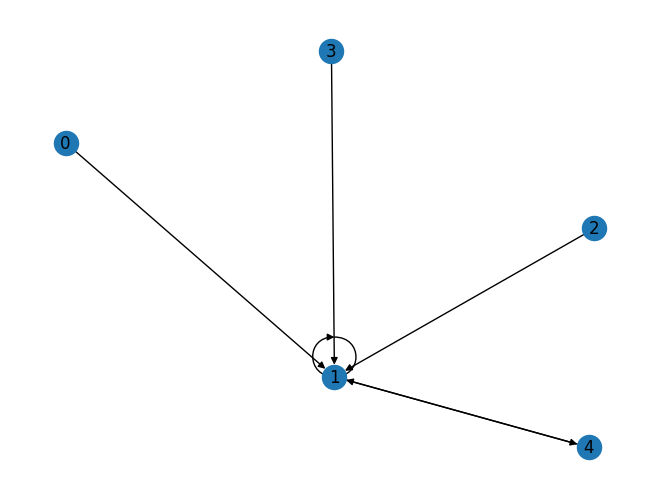

In [3]:
G = nx.from_numpy_array(A, create_using=nx.DiGraph)
nx.draw(G, with_labels=True)
plt.show()

In [4]:
def compute_H(A):
    n = A.shape[0]
    deg_out = np.sum(A, axis=1)
    idx_sink = np.argwhere(deg_out==0)
    H = np.zeros_like(A)
    for i in range(n):
        for j in range(n):
            if A[i,j]==1 and deg_out[i] != 0:
                H[i, j] = 1.0 / deg_out[i]
    return H,idx_sink

def compute_S(A):
    n = A.shape[0]
    H,idx_sink = compute_H(A)
    
    S = H.copy()
    for i in idx_sink:
        S[i,:] = 1.0 / n
    return S   

def compute_G(A,alpha = 0.85):
    n = A.shape[0]
    S = compute_S(A)
    G = alpha*S+(1-alpha)/n*np.ones((n,n))
    return G

def page_rank(G,alpha):
    G = compute_G(G,alpha)
    return find_steady_state(G)


In [5]:
G = compute_G(A)
ss = find_steady_state(G.T)
print(ss)
print(np.argsort(ss)[::-1])

[0.03       0.61754386 0.03       0.03       0.29245614]
[1 4 2 0 3]
